# CSV Data Analysis
# ====================================================
# Save this as: csv_analysis_tutorial.ipynb
# Each section represents a separate Jupyter notebook cell

# CELL 1: Title and Introduction
# ===============================
"""
# 📊 CSV Data Analysis 


## Prerequisites:
Make  installed: `pip install pandas numpy matplotlib seaborn faker`



In [4]:
# CELL 2: Import Libraries
# ========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")
print("📚 Libraries loaded:")
print("- pandas: Data manipulation and analysis")
print("- numpy: Numerical operations") 
print("- matplotlib & seaborn: Data visualization")
print("- datetime: Date and time operations")

✅ All libraries imported successfully!
📚 Libraries loaded:
- pandas: Data manipulation and analysis
- numpy: Numerical operations
- matplotlib & seaborn: Data visualization
- datetime: Date and time operations


In [5]:
# CELL 3: Load and Explore Data - Function Definition
# ===================================================
"""
## 📂 Step 1: Loading and Exploring CSV Data

The first step in any data analysis is to load your data and understand its structure.
This function will help us:
- Load the CSV file into a pandas DataFrame
- Check the shape (rows and columns)
- Examine data types
- Preview the first and last few rows
- Get general information about the dataset
"""

def load_and_explore_csv(file_path):
    """
    Load CSV file and perform initial exploration
    
    Parameters:
    file_path (str): Path to the CSV file
    
    Returns:
    pandas.DataFrame: Loaded dataset
    """
    
    print("📊 STEP 1: LOADING AND EXPLORING DATA")
    print("=" * 50)
    
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Basic information about the dataset
    print(f"📈 Dataset shape: {df.shape}")
    print(f"📝 Number of rows: {df.shape[0]}")
    print(f"📋 Number of columns: {df.shape[1]}")
    
    print("\n🏷️  Column names and data types:")
    print(df.dtypes)
    
    print("\n👀 First 5 rows:")
    print(df.head())
    
    print("\n👀 Last 5 rows:")
    print(df.tail())
    
    print("\n📊 Dataset info:")
    print(df.info())
    
    return df

In [6]:
# CELL 4: Execute Data Loading
# ============================
"""
### Now let's load our sample data:
Make sure you have the `sample_customer_data.csv` file in your working directory.
If you don't have it, run the CSV generator script first.
"""

# Load the data
try:
    df = load_and_explore_csv('sample_customer_data.csv')
    print("\n✅ Data loaded successfully!")
except FileNotFoundError:
    print("❌ File not found! Please ensure 'sample_customer_data.csv' is in your working directory.")
    print("💡 Run the CSV generator script first to create the sample data.")

📊 STEP 1: LOADING AND EXPLORING DATA
📈 Dataset shape: (1000, 17)
📝 Number of rows: 1000
📋 Number of columns: 17

🏷️  Column names and data types:
customer_id            int64
first_name            object
last_name             object
email                 object
phone                 object
age                    int64
city                  object
country               object
job_title             object
salary                 int64
registration_date     object
last_login            object
orders_count           int64
total_spent          float64
customer_segment      object
is_active               bool
department            object
dtype: object

👀 First 5 rows:
   customer_id first_name last_name                    email  \
0            1   Danielle   Johnson       john21@example.net   
1            2    Roberto   Ramirez  susanrogers@example.org   
2            3    Melissa  Delacruz     oramirez@example.com   
3            4     Jeremy   Johnson    richard13@example.net   
4         

In [7]:
# CELL 5: Data Quality Assessment - Function Definition
# =====================================================
"""
## 🔍 Step 2: Data Quality Assessment

Before analyzing data, we need to check its quality:
- **Missing values**: Are there any empty cells?
- **Duplicates**: Are there any repeated records?
- **Data types**: Are columns in the correct format?
- **Unique values**: How many unique values does each column have?

This step is crucial because poor data quality can lead to incorrect analysis results.
"""

def assess_data_quality(df):
    """
    Check for missing values, duplicates, and data quality issues
    
    Parameters:
    df (pandas.DataFrame): Dataset to assess
    
    Returns:
    pandas.DataFrame: Same dataset (unchanged)
    """
    
    print("📋 STEP 2: DATA QUALITY ASSESSMENT")
    print("=" * 50)
    
    # Check for missing values
    print("🔍 Missing values per column:")
    missing_values = df.isnull().sum()
    missing_columns = missing_values[missing_values > 0]
    
    if len(missing_columns) > 0:
        print(missing_columns)
        print(f"⚠️  Total missing values: {missing_values.sum()}")
    else:
        print("✅ No missing values found!")
    
    # Check for duplicates
    duplicate_count = df.duplicated().sum()
    print(f"\n🔄 Duplicate rows: {duplicate_count}")
    
    if duplicate_count == 0:
        print("✅ No duplicate rows found!")
    else:
        print(f"⚠️  Found {duplicate_count} duplicate rows that may need attention")
    
    # Check data types and unique values
    print("\n📊 Data type analysis:")
    print(f"{'Column':<20} {'Data Type':<15} {'Unique Values':<15} {'Sample Value'}")
    print("-" * 65)
    
    for col in df.columns:
        sample_value = str(df[col].iloc[0]) if not df[col].empty else "N/A"
        if len(sample_value) > 20:
            sample_value = sample_value[:17] + "..."
        print(f"{col:<20} {str(df[col].dtype):<15} {df[col].nunique():<15} {sample_value}")
    
    return df

# CELL 6: Execute Data Quality Assessment
# =======================================
"""
### Let's assess the quality of our dataset:
"""

df = assess_data_quality(df)

📋 STEP 2: DATA QUALITY ASSESSMENT
🔍 Missing values per column:
✅ No missing values found!

🔄 Duplicate rows: 0
✅ No duplicate rows found!

📊 Data type analysis:
Column               Data Type       Unique Values   Sample Value
-----------------------------------------------------------------
customer_id          int64           1000            1
first_name           object          346             Danielle
last_name            object          469             Johnson
email                object          997             john21@example.net
phone                object          1000            001-581-896-0013x...
age                  int64           63              58
city                 object          973             South Bridget
country              object          238             Sudan
job_title            object          510             Accounting techni...
salary               int64           994             44592
registration_date    object          544             2025-03-16
last

In [8]:
# CELL 7: Basic Statistics - Function Definition
# ==============================================
"""
## 📈 Step 3: Basic Statistics and Summaries

Understanding the distribution and characteristics of your data is essential:
- **Numerical data**: Mean, median, standard deviation, min/max values
- **Categorical data**: Most common values, unique categories
- **Data distribution**: Understanding how values are spread

This helps identify patterns, outliers, and potential issues in your data.
"""

def generate_basic_statistics(df):
    """
    Generate descriptive statistics for the dataset
    
    Parameters:
    df (pandas.DataFrame): Dataset to analyze
    
    Returns:
    tuple: (numerical_columns, categorical_columns)
    """
    
    print("📈 STEP 3: BASIC STATISTICS AND SUMMARIES")
    print("=" * 50)
    
    # Identify numerical and categorical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
    
    # Numerical columns statistics
    if len(numerical_cols) > 0:
        print("🔢 Numerical columns summary:")
        print(df[numerical_cols].describe().round(2))
    
    # Categorical columns analysis
    if len(categorical_cols) > 0:
        print(f"\n📝 Categorical columns: {list(categorical_cols)}")
        
        for col in categorical_cols:
            print(f"\n📊 {col} - Value counts:")
            value_counts = df[col].value_counts().head(10)  # Show top 10 values
            print(value_counts)
            
            if len(df[col].value_counts()) > 10:
                print(f"... and {len(df[col].value_counts()) - 10} more unique values")
    
    print(f"\n📋 Summary:")
    print(f"- Numerical columns: {len(numerical_cols)}")
    print(f"- Categorical columns: {len(categorical_cols)}")
    print(f"- Total columns: {len(df.columns)}")
    
    return numerical_cols, categorical_cols

# CELL 8: Execute Basic Statistics
# ================================
"""
### Let's analyze the statistical properties of our data:
"""

numerical_cols, categorical_cols = generate_basic_statistics(df)

📈 STEP 3: BASIC STATISTICS AND SUMMARIES
🔢 Numerical columns summary:
       customer_id      age     salary  orders_count  total_spent
count      1000.00  1000.00    1000.00       1000.00      1000.00
mean        500.50    48.44   88998.61         25.39      2536.68
std         288.82    18.60   34844.08         14.53      1414.08
min           1.00    18.00   30167.00          0.00         0.46
25%         250.75    32.00   58642.75         13.75      1366.46
50%         500.50    48.00   87106.00         25.50      2579.85
75%         750.25    65.00  120222.50         38.00      3732.20
max        1000.00    80.00  149946.00         50.00      4996.87

📝 Categorical columns: ['first_name', 'last_name', 'email', 'phone', 'city', 'country', 'job_title', 'registration_date', 'last_login', 'customer_segment', 'is_active', 'department']

📊 first_name - Value counts:
first_name
Michael        29
James          18
Christopher    17
John           17
David          16
Robert         15
Bri

In [9]:
# CELL 9: Data Filtering - Function Definition
# ============================================
"""
## 🔍 Step 4: Data Filtering and Selection

Filtering is one of the most important skills in data analysis:
- **Column selection**: Choose specific columns for analysis
- **Row filtering**: Find records that meet certain conditions
- **Multiple conditions**: Combine filters using AND (&) and OR (|) operators
- **Text filtering**: Search for specific text patterns

This allows you to focus on relevant subsets of your data.
"""

def demonstrate_filtering(df):
    """
    Show various ways to filter and select data
    
    Parameters:
    df (pandas.DataFrame): Dataset to filter
    
    Returns:
    tuple: (filtered_dataframes...)
    """
    
    print("🔍 STEP 4: DATA FILTERING AND SELECTION")
    print("=" * 50)
    
    # 1. Select specific columns
    print("📋 1. Selecting specific columns (name and age):")
    basic_info = df[['first_name', 'last_name', 'age']].head()
    print(basic_info)
    print(f"Selected {len(basic_info.columns)} columns from original {len(df.columns)}")
    
    # 2. Filter rows based on single condition
    print("\n🔍 2. Filtering: Customers older than 50:")
    older_customers = df[df['age'] > 50]
    print(f"Found {len(older_customers)} customers older than 50 (out of {len(df)} total)")
    print(older_customers[['first_name', 'last_name', 'age']].head())
    
    # 3. Multiple conditions with AND
    print("\n💰 3. Filtering: Active customers with high spending (>$2000):")
    high_value_active = df[(df['is_active'] == True) & (df['total_spent'] > 2000)]
    print(f"Found {len(high_value_active)} high-value active customers")
    if len(high_value_active) > 0:
        print(high_value_active[['first_name', 'last_name', 'total_spent', 'is_active']].head())
    
    # 4. Filter by categorical values
    print("\n💼 4. Filtering: Customers from IT department:")
    it_customers = df[df['department'] == 'IT']
    print(f"Found {len(it_customers)} IT department customers")
    if len(it_customers) > 0:
        print(it_customers[['first_name', 'last_name', 'department', 'job_title']].head())
    
    # 5. Filter using isin() for multiple values
    print("\n🏆 5. Filtering: Premium customers (Gold or Platinum):")
    premium_customers = df[df['customer_segment'].isin(['Gold', 'Platinum'])]
    print(f"Found {len(premium_customers)} premium customers")
    print(premium_customers['customer_segment'].value_counts())
    
    # 6. String filtering (contains)
    print("\n📧 6. Filtering: Customers with gmail addresses:")
    gmail_customers = df[df['email'].str.contains('@gmail.com', na=False)]
    print(f"Found {len(gmail_customers)} customers with Gmail addresses")
    
    return older_customers, high_value_active, it_customers, premium_customers

# CELL 10: Execute Data Filtering
# ===============================
"""
### Let's explore different filtering techniques:
"""

older_customers, high_value_active, it_customers, premium_customers = demonstrate_filtering(df)

🔍 STEP 4: DATA FILTERING AND SELECTION
📋 1. Selecting specific columns (name and age):
  first_name last_name  age
0   Danielle   Johnson   58
1    Roberto   Ramirez   65
2    Melissa  Delacruz   19
3     Jeremy   Johnson   59
4     Daniel    Burton   66
Selected 3 columns from original 17

🔍 2. Filtering: Customers older than 50:
Found 460 customers older than 50 (out of 1000 total)
  first_name last_name  age
0   Danielle   Johnson   58
1    Roberto   Ramirez   65
3     Jeremy   Johnson   59
4     Daniel    Burton   66
6     Andrea     Baker   72

💰 3. Filtering: Active customers with high spending (>$2000):
Found 303 high-value active customers
   first_name last_name  total_spent  is_active
0    Danielle   Johnson      3707.75       True
7     Michele     Jones      2760.20       True
11  Elizabeth   Edwards      2311.30       True
12    Vanessa    Valdez      3880.00       True
14       John    Garcia      2294.26       True

💼 4. Filtering: Customers from IT department:
Found 149

📊 STEP 5: DATA GROUPING AND AGGREGATION
💰 1. Average spending by customer segment:
customer_segment
Bronze      2551.61
Gold        2549.51
Silver      2536.71
Platinum    2509.35
Name: total_spent, dtype: float64

📊 2. Detailed statistics by customer segment:
                  Customer Count  Avg Spending  Median Spending  Std Deviation
customer_segment                                                              
Bronze                       254       2551.61          2566.72        1418.63
Gold                         241       2549.51          2602.89        1389.67
Platinum                     252       2509.35          2483.68        1446.44
Silver                       253       2536.71          2671.37        1407.94

🏢 3. Average salary by department and customer segment:
department  customer_segment
Finance     Bronze              97431.31
            Gold                80014.53
            Platinum            87341.62
            Silver              83632.71
HR          Bro

ValueError: 'facecolor' or 'color' argument must be a valid color orsequence of colors.

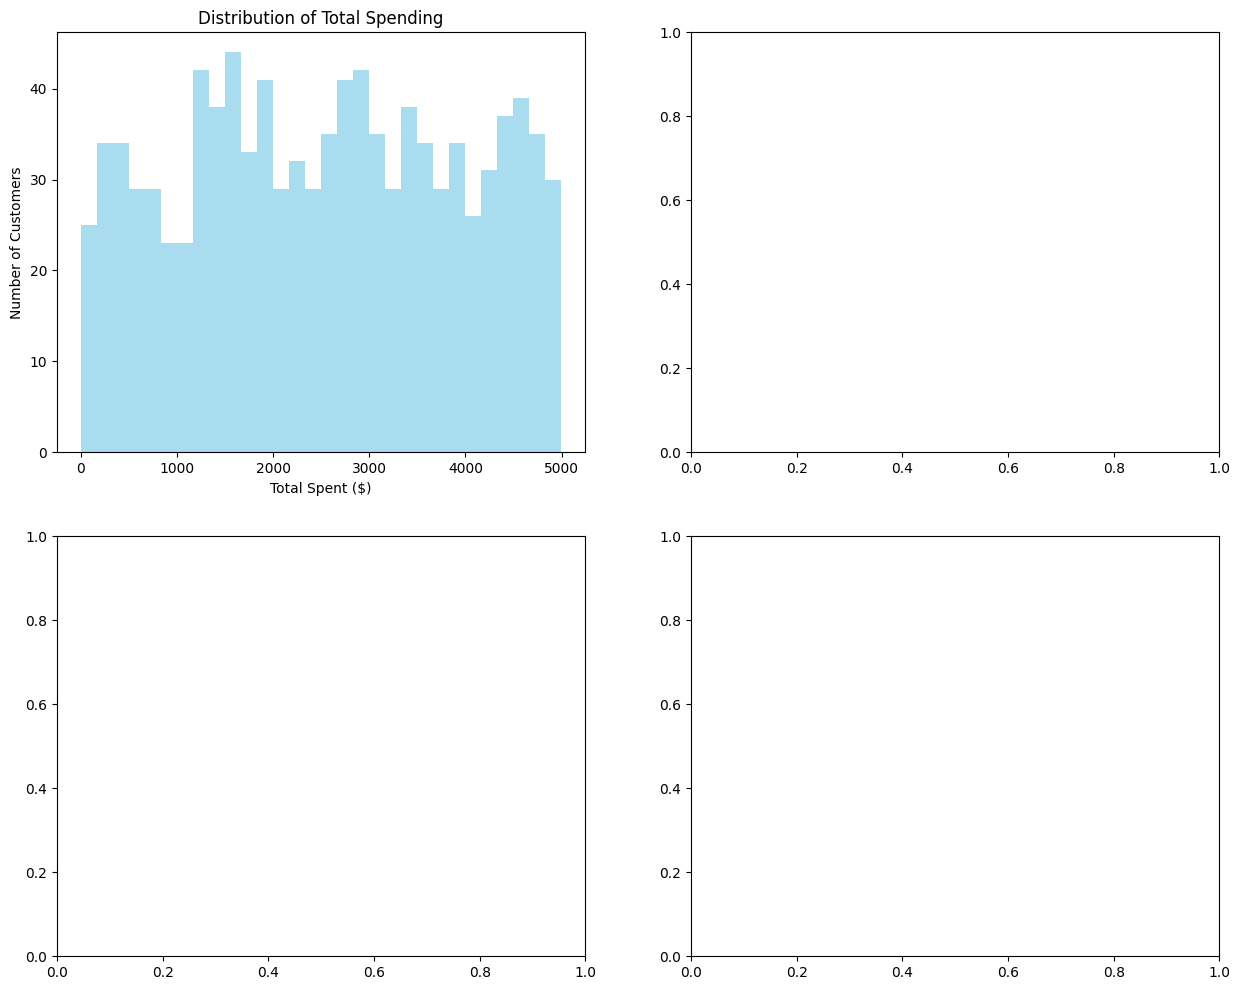

In [11]:

# CELL 11: Data Grouping and Aggregation - Function Definition
# ============================================================
"""
## 📊 Step 5: Data Grouping and Aggregation

Grouping allows you to analyze data by categories:
- **Single grouping**: Group by one column (e.g., by department)
- **Multiple grouping**: Group by several columns (e.g., by department and segment)
- **Aggregation functions**: Calculate statistics for each group (mean, sum, count, etc.)
- **Multiple aggregations**: Calculate different statistics for different columns

This is essential for creating summaries and understanding patterns across different categories.
"""

def demonstrate_grouping(df):
    """
    Show how to group data and perform aggregations
    
    Parameters:
    df (pandas.DataFrame): Dataset to group
    
    Returns:
    tuple: (grouped_results...)
    """
    
    print("📊 STEP 5: DATA GROUPING AND AGGREGATION")
    print("=" * 50)
    
    # 1. Group by single column - simple aggregation
    print("💰 1. Average spending by customer segment:")
    segment_spending = df.groupby('customer_segment')['total_spent'].mean().round(2)
    print(segment_spending.sort_values(ascending=False))
    
    # 2. Group by single column - multiple statistics
    print("\n📊 2. Detailed statistics by customer segment:")
    segment_stats = df.groupby('customer_segment')['total_spent'].agg(['count', 'mean', 'median', 'std']).round(2)
    segment_stats.columns = ['Customer Count', 'Avg Spending', 'Median Spending', 'Std Deviation']
    print(segment_stats)
    
    # 3. Group by multiple columns
    print("\n🏢 3. Average salary by department and customer segment:")
    dept_segment_salary = df.groupby(['department', 'customer_segment'])['salary'].mean().round(2)
    print(dept_segment_salary.head(15))
    
    # 4. Multiple aggregations on different columns
    print("\n📈 4. Comprehensive statistics by department:")
    dept_stats = df.groupby('department').agg({
        'salary': ['mean', 'median', 'min', 'max'],
        'age': 'mean',
        'total_spent': ['sum', 'mean'],
        'customer_id': 'count',
        'is_active': lambda x: (x == True).sum()  # Count of active customers
    }).round(2)
    
    # Flatten column names for better readability
    dept_stats.columns = ['Avg_Salary', 'Med_Salary', 'Min_Salary', 'Max_Salary', 
                         'Avg_Age', 'Total_Revenue', 'Avg_Spending', 'Customer_Count', 'Active_Count']
    print(dept_stats)
    
    # 5. Percentage calculations
    print("\n📊 5. Active customer percentage by segment:")
    active_pct = df.groupby('customer_segment').apply(
        lambda x: (x['is_active'].sum() / len(x) * 100).round(1)
    ).sort_values(ascending=False)
    print(active_pct)
    
    return segment_spending, dept_stats, active_pct

# CELL 12: Execute Grouping and Aggregation
# =========================================
"""
### Let's group our data and calculate meaningful statistics:
"""

segment_spending, dept_stats, active_pct = demonstrate_grouping(df)

# CELL 13: Data Transformation - Function Definition
# ==================================================
"""
## 🔄 Step 6: Data Transformation and Feature Engineering

Creating new columns and transforming existing data:
- **Calculated columns**: Create new columns from existing ones
- **Categorical binning**: Convert continuous variables into categories
- **Text manipulation**: Combine or split text columns
- **Conditional columns**: Create columns based on conditions
- **Mathematical operations**: Apply formulas to create derived metrics

This helps create more meaningful insights and prepare data for analysis.
"""

def demonstrate_transformation(df):
    """
    Show how to create new columns and transform data
    
    Parameters:
    df (pandas.DataFrame): Dataset to transform
    
    Returns:
    pandas.DataFrame: Transformed dataset
    """
    
    print("🔄 STEP 6: DATA TRANSFORMATION AND FEATURE ENGINEERING")
    print("=" * 50)
    
    # Create a copy to avoid modifying original data
    df_transformed = df.copy()
    
    # 1. Simple column combination
    print("👥 1. Creating full name from first and last name:")
    df_transformed['full_name'] = df_transformed['first_name'] + ' ' + df_transformed['last_name']
    print("✅ Created 'full_name' column")
    print(df_transformed['full_name'].head())
    
    # 2. Mathematical calculations
    print("\n💰 2. Calculating spending per order:")
    # Add 1 to avoid division by zero
    df_transformed['spending_per_order'] = (df_transformed['total_spent'] / 
                                          (df_transformed['orders_count'] + 1)).round(2)
    print("✅ Created 'spending_per_order' column")
    print(f"Average spending per order: ${df_transformed['spending_per_order'].mean():.2f}")
    
    # 3. Categorical binning - Age categories
    print("\n👴 3. Creating age categories:")
    def categorize_age(age):
        if age < 30:
            return 'Young (18-29)'
        elif age < 50:
            return 'Middle-aged (30-49)'
        else:
            return 'Senior (50+)'
    
    df_transformed['age_category'] = df_transformed['age'].apply(categorize_age)
    print("✅ Created 'age_category' column")
    print(df_transformed['age_category'].value_counts())
    
    # 4. Binary indicator columns
    print("\n💎 4. Creating binary indicator columns:")
    median_spending = df_transformed['total_spent'].median()
    df_transformed['high_spender'] = df_transformed['total_spent'] > median_spending
    df_transformed['high_earner'] = df_transformed['salary'] > df_transformed['salary'].median()
    print(f"✅ Created binary columns based on median values")
    print(f"High spenders (>${median_spending:.2f}+): {df_transformed['high_spender'].sum()}")
    
    # 5. Date calculations (if date columns exist)
    if 'registration_date' in df_transformed.columns:
        print("\n📅 5. Working with dates:")
        df_transformed['registration_date'] = pd.to_datetime(df_transformed['registration_date'])
        df_transformed['days_since_registration'] = (pd.Timestamp.now() - df_transformed['registration_date']).dt.days
        print("✅ Created 'days_since_registration' column")
        print(f"Average customer tenure: {df_transformed['days_since_registration'].mean():.0f} days")
    
    # 6. Text manipulation
    print("\n📧 6. Email domain extraction:")
    df_transformed['email_domain'] = df_transformed['email'].str.split('@').str[1]
    print("✅ Created 'email_domain' column")
    print("Top email domains:")
    print(df_transformed['email_domain'].value_counts().head())
    
    # Display summary of new columns
    new_columns = ['full_name', 'spending_per_order', 'age_category', 'high_spender', 'email_domain']
    if 'days_since_registration' in df_transformed.columns:
        new_columns.append('days_since_registration')
    
    print(f"\n📋 Summary: Created {len(new_columns)} new columns:")
    for col in new_columns:
        if col in df_transformed.columns:
            print(f"- {col}")
    
    print(f"\nDataset now has {len(df_transformed.columns)} columns (was {len(df.columns)})")
    
    return df_transformed

# CELL 14: Execute Data Transformation
# ===================================
"""
### Let's create new meaningful columns from our existing data:
"""

df_transformed = demonstrate_transformation(df)

# CELL 15: Preview Transformed Data
# ================================
"""
### Let's see our transformed data with new columns:
"""

print("🔍 TRANSFORMED DATA PREVIEW")
print("=" * 40)

# Show some of the new columns
preview_columns = ['full_name', 'age', 'age_category', 'total_spent', 'spending_per_order', 'high_spender']
available_columns = [col for col in preview_columns if col in df_transformed.columns]

print("Sample of transformed data:")
print(df_transformed[available_columns].head(10))

# CELL 16: Sorting and Ranking - Function Definition
# ==================================================
"""
## 📋 Step 7: Sorting and Ranking Data

Organizing data in meaningful order:
- **Single column sorting**: Order by one criterion
- **Multiple column sorting**: Order by multiple criteria with different priorities
- **Top/Bottom N**: Find the highest or lowest values
- **Ranking**: Assign ranks to data points

This helps identify patterns, outliers, and top performers in your data.
"""

def demonstrate_sorting(df):
    """
    Show different ways to sort data
    
    Parameters:
    df (pandas.DataFrame): Dataset to sort
    
    Returns:
    tuple: (sorted_results...)
    """
    
    print("📋 STEP 7: SORTING AND RANKING")
    print("=" * 50)
    
    # 1. Sort by single column - highest values
    print("💰 1. Top 10 highest spenders:")
    top_spenders = df.nlargest(10, 'total_spent')[['first_name', 'last_name', 'total_spent', 'customer_segment']]
    print(top_spenders)
    
    # 2. Sort by single column - lowest values
    print("\n💸 2. Bottom 5 spenders:")
    low_spenders = df.nsmallest(5, 'total_spent')[['first_name', 'last_name', 'total_spent']]
    print(low_spenders)
    
    # 3. Sort by multiple columns
    print("\n🏢 3. Sorted by department, then by salary (descending):")
    sorted_data = df.sort_values(['department', 'salary'], ascending=[True, False])
    display_cols = ['first_name', 'last_name', 'department', 'salary', 'customer_segment']
    print(sorted_data[display_cols].head(15))
    
    # 4. Add ranking columns
    print("\n🏆 4. Creating ranking columns:")
    df_ranked = df.copy()
    df_ranked['spending_rank'] = df_ranked['total_spent'].rank(ascending=False, method='dense')
    df_ranked['salary_rank'] = df_ranked['salary'].rank(ascending=False, method='dense')
    
    # Show top 10 by spending rank
    top_ranked = df_ranked.nsmallest(10, 'spending_rank')[
        ['first_name', 'last_name', 'total_spent', 'spending_rank', 'customer_segment']
    ]
    print(top_ranked)
    
    # 5. Sort by custom criteria
    print("\n⭐ 5. Best customers (high spending + high orders):")
    df['customer_score'] = (df['total_spent'] * 0.7) + (df['orders_count'] * 100 * 0.3)
    best_customers = df.nlargest(10, 'customer_score')[
        ['first_name', 'last_name', 'total_spent', 'orders_count', 'customer_score']
    ]
    print(best_customers.round(2))
    
    return top_spenders, best_customers

# CELL 17: Execute Sorting and Ranking
# ====================================
"""
### Let's sort our data to find patterns and top performers:
"""

top_spenders, best_customers = demonstrate_sorting(df_transformed)

# CELL 18: Data Export - Function Definition
# ==========================================
"""
## 💾 Step 8: Saving and Exporting Data

After analyzing and transforming data, you'll want to save your results:
- **Full dataset**: Save the complete transformed dataset
- **Filtered subsets**: Save specific filtered data
- **Summary reports**: Export aggregated results
- **Different formats**: CSV, Excel, or other formats

This preserves your work and allows sharing results with others.
"""

def save_processed_data(df, df_transformed, filename_prefix='processed'):
    """
    Save processed data to new CSV files
    
    Parameters:
    df (pandas.DataFrame): Original dataset
    df_transformed (pandas.DataFrame): Transformed dataset
    filename_prefix (str): Prefix for output files
    """
    
    print("💾 STEP 8: SAVING AND EXPORTING DATA")
    print("=" * 50)
    
    # 1. Save the complete transformed dataset
    transformed_filename = f'{filename_prefix}_complete_data.csv'
    df_transformed.to_csv(transformed_filename, index=False)
    print(f"✅ Complete transformed data saved to: {transformed_filename}")
    print(f"   - Rows: {len(df_transformed)}, Columns: {len(df_transformed.columns)}")
    
    # 2. Save a customer summary report
    summary_filename = f'{filename_prefix}_customer_summary.csv'
    summary_columns = ['customer_id', 'full_name', 'age', 'age_category', 
                      'total_spent', 'customer_segment', 'department', 'is_active']
    available_summary_cols = [col for col in summary_columns if col in df_transformed.columns]
    
    df_transformed[available_summary_cols].to_csv(summary_filename, index=False)
    print(f"✅ Customer summary saved to: {summary_filename}")
    print(f"   - Rows: {len(df_transformed)}, Columns: {len(available_summary_cols)}")
    
    # 3. Save high-value customers only
    if 'high_spender' in df_transformed.columns:
        high_value_filename = f'{filename_prefix}_high_value_customers.csv'
        high_value_customers = df_transformed[df_transformed['high_spender'] == True]
        high_value_customers.to_csv(high_value_filename, index=False)
        print(f"✅ High-value customers saved to: {high_value_filename}")
        print(f"   - Rows: {len(high_value_customers)}, Columns: {len(high_value_customers.columns)}")
    
    # 4. Save department analysis
    dept_analysis_filename = f'{filename_prefix}_department_analysis.csv'
    dept_analysis = df_transformed.groupby('department').agg({
        'customer_id': 'count',
        'salary': 'mean',
        'total_spent': 'mean',
        'age': 'mean',
        'is_active': lambda x: (x == True).sum()
    }).round(2)
    dept_analysis.columns = ['Employee_Count', 'Avg_Salary', 'Avg_Spending', 'Avg_Age', 'Active_Count']
    dept_analysis.to_csv(dept_analysis_filename)
    print(f"✅ Department analysis saved to: {dept_analysis_filename}")
    
    print(f"\n📁 All files saved successfully!")
    return transformed_filename, summary_filename

# CELL 19: Execute Data Export
# ============================
"""
### Let's save our processed data and analysis results:
"""

transformed_file, summary_file = save_processed_data(df, df_transformed)

# CELL 20: Advanced Analysis Examples
# ===================================
"""
## 🎓 Step 9: Advanced Analysis Examples

Now that you've learned the basics, let's explore some advanced techniques:
"""

print("🎓 ADVANCED ANALYSIS EXAMPLES")
print("=" * 50)

# 1. Correlation Analysis
print("📊 1. Correlation analysis between numerical variables:")
numerical_data = df_transformed.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr().round(3)

# Show correlations with total_spent
if 'total_spent' in correlation_matrix.columns:
    spending_correlations = correlation_matrix['total_spent'].sort_values(ascending=False)
    print("Variables correlated with total spending:")
    print(spending_correlations)

# 2. Cross-tabulation
print("\n📋 2. Cross-tabulation: Customer segment vs Department:")
if 'age_category' in df_transformed.columns:
    cross_tab = pd.crosstab(df_transformed['customer_segment'], 
                           df_transformed['age_category'], 
                           margins=True)
    print(cross_tab)

# 3. Percentile analysis
print("\n📈 3. Spending percentiles by customer segment:")
spending_percentiles = df_transformed.groupby('customer_segment')['total_spent'].quantile([0.25, 0.5, 0.75]).round(2)
print(spending_percentiles)

# CELL 21: Data Visualization Examples
# ====================================
"""
## 📊 Step 10: Basic Data Visualization

Let's create some simple visualizations to better understand our data:
"""

print("📊 CREATING DATA VISUALIZATIONS")
print("=" * 40)

# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution of total spending
axes[0, 0].hist(df_transformed['total_spent'], bins=30, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Distribution of Total Spending')
axes[0, 0].set_xlabel('Total Spent ($)')
axes[0, 0].set_ylabel('Number of Customers')

# 2. Average spending by customer segment
segment_avg = df_transformed.groupby('customer_segment')['total_spent'].mean()
axes[0, 1].bar(segment_avg.index, segment_avg.values, color=['bronze', 'silver', 'gold', 'purple'])
axes[0, 1].set_title('Average Spending by Customer Segment')
axes[0, 1].set_ylabel('Average Spending ($)')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Age distribution
axes[1, 0].hist(df_transformed['age'], bins=20, alpha=0.7, color='lightgreen')
axes[1, 0].set_title('Age Distribution')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Number of Customers')

# 4. Customer count by department
dept_counts = df_transformed['department'].value_counts()
axes[1, 1].pie(dept_counts.values, labels=dept_counts.index, autopct='%1.1f%%')
axes[1, 1].set_title('Customer Distribution by Department')

plt.tight_layout()
plt.show()

print("✅ Visualizations created successfully!")

